**1.1 Introduction to the Use case for Project A**

<div class="usecase-title">PedalPath: Data-Driven Insights for Melbourne's Cycling Future</div>

<div class="usecase-authors"><b>Authored by: </b>Nishant Umesh Khamkar</div>

<div class="usecase-duration"><b>Duration:</b> mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Machine learning</div>
</div>

**Objective:** 

The projects objective is to assess and study how bicycle paths are utilized in Melbourne by utilizing information and traffic data analysis techniques." The examination includes determining the distances of routes using coordinates and identifying characteristics, like bike density and usage rates while investigating traffic distribution among various route categories." The aim is to pinpoint used routes understand the factors influencing bike traffic patterns and offer data driven suggestions, for improving cycling infrastructure fostering eco transportation options and enhancing route accessibility. 

**Scenario:** 

With the increasing popularity of cycling in Melbourne, understanding when and where cyclists are most active is crucial for city planners. By analyzing bicycle count data, you can pinpoint peak usage times and locations, assess the adequacy of current infrastructure, and recommend enhancements to support safe and efficient cycling.

**1.2 Loading Datasets**

In [24]:
import requests
import pandas as pd

In [25]:
from io import StringIO
 
#API details for the first dataset
base_url_1 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id_1 = 'bicycle-routes-including-informal-on-road-and-off-road-routes'
url_1 = f"{base_url_1}{dataset_id_1}/exports/csv"
 
#API details for the second dataset
base_url_2 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
dataset_id_2 = 'annual-bike-counts-super-tuesday'
url_2 = f"{base_url_1}{dataset_id_2}/exports/csv"
 
 
#Fetching the first dataset (bicycle-routes-including-informal-on-road-and-off-road-routes)
response_1 = requests.get(url_1)
df_1 = pd.read_csv(StringIO(response_1.text), delimiter=';')
 
#Fetching the second dataset (Annual Bike Counts (Super Tuesday))
response_2 = requests.get(url_2)
df_2 = pd.read_csv(StringIO(response_2.text), delimiter=';')
 
print("Column Names for first dataset")
print(df_1.columns.tolist())
 
print("Column Names for second dataset")
print(df_2.columns.tolist())

Column Names for first dataset
['geo_point_2d', 'geo_shape', 'name', 'direction', 'info', 'status', 'notes', 'type']
Column Names for second dataset
['state', 'electorate', 'site_id', 'latitude', 'longitude', 'legs', 'description', 'layout_1', 'layout_1_enter', 'layout_2', 'layout_2_enter', 'layout_3', 'layout_3_enter', 'layout_4', 'layout_4_enter', 'layout_5', 'layout_5_enter', 'layout_6', 'layout_6_enter', 'leg1_2', 'leg1_3', 'leg1_4', 'leg1_5', 'leg1_6', 'leg2_1', 'leg2_3', 'leg2_4', 'leg2_5', 'leg2_6', 'leg3_1', 'leg3_2', 'leg3_4', 'leg3_5', 'leg3_6', 'leg4_1', 'leg4_2', 'leg4_3', 'leg4_5', 'leg4_6', 'leg5_1', 'leg5_2', 'leg5_3', 'leg5_4', 'leg5_6', 'leg6_1', 'leg6_2', 'leg6_3', 'leg6_4', 'leg6_5', 'leg1_enter', 'leg1_exit', 'leg1_total', 'leg2_enter', 'leg2_exit', 'leg2_total', 'leg3_enter', 'leg3_exit', 'leg3_total', 'leg4_enter', 'leg4_exit', 'leg4_total', 'leg5_enter', 'leg5_exit', 'leg5_total', 'leg6_enter', 'leg6_exit', 'leg6_total', 'female', 'male', 'not_known', 'total', 'y

In [26]:
bicycle_routes_df = df_1
bike_counts_df = df_2

In [27]:
# Print first 5 rows in tabular format
print("First 5 rows of Bicycle Routes Dataset:")
print(bicycle_routes_df.head())

First 5 rows of Bicycle Routes Dataset:
                             geo_point_2d  \
0  -37.79222994900859, 144.94940742049585   
1  -37.792105456782814, 144.9177809870309   
2  -37.78115951525465, 144.95417546909417   
3  -37.80388778318796, 144.93230774579578   
4  -37.80511491028456, 144.95799608462175   

                                           geo_shape  \
0  {"coordinates": [[[144.951780451295, -37.79023...   
1  {"coordinates": [[[144.912562850355, -37.79449...   
2  {"coordinates": [[[144.951430861753, -37.78076...   
3  {"coordinates": [[[144.929334966589, -37.80320...   
4  {"coordinates": [[[144.958420627206, -37.80603...   

                                       name        direction  info status  \
0                       Off-Road Bike Route  Both Directions   NaN    NaN   
1                       Off-Road Bike Route  Both Directions   NaN    NaN   
2  Off-Road Bike Route - Capital City Trail  Both Directions   NaN    NaN   
3                       Off-Road Bike Route 

In [29]:
print("\nFirst 5 rows of Annual Bike Counts Dataset:")
print(bike_counts_df.head())


First 5 rows of Annual Bike Counts Dataset:
  state electorate  site_id   latitude   longitude  legs  \
0   VIC  Melbourne     4406 -37.794117  144.927689     4   
1   VIC  Melbourne     4408 -37.795096  144.935852     4   
2   VIC  Melbourne     4409 -37.795421  144.938850     5   
3   VIC  Melbourne     4412 -37.799747  144.957474     4   
4   VIC  Melbourne     4413 -37.800289  144.943954     4   

                                         description  layout_1  \
0  McCracken St [N], Macaulay Rd [E], Kensington ...         0   
1  Upstream direction [N], Macaulay Rd [E], Moone...         7   
2  Boundary Rd [N], Canning St [E], Macaulay Rd [...         8   
3  Royal Pde [N], Grattan St [E], Royal Pde (city...         6   
4  Arden St towards Curzon St [E], Drvyburgh St [...        98   

   layout_1_enter  layout_2  ...  7_00_am  7_15_am  7_30_am  7_45_am  8_00_am  \
0             180        98  ...      NaN      NaN      NaN      NaN      NaN   
1             187        98  ...   

**1.3 Calculating Route lengths and Geographic Integration**

We're caluclating route lengths of bike paths using geographical information data points such as latitude and longitude in the dataset we have at hand. By applying methods we determine the distance (geodesic distance) between sequential locations. This computation is a component of our research allowing us to measure the features of paths and include this data in subsequent studies like patterns of route usage and congestion levels. Our goal is to gain insights, into how the attributes of routes impact bike traffic flow and the usage of infrastructure by incorporating details. 

In [30]:
from geopy.distance import geodesic
import numpy as np

# Extract start and end points from `geo_point_2d`
bicycle_routes_df["start_point"] = bicycle_routes_df["geo_point_2d"].apply(
    lambda x: tuple(map(float, x.split(", "))) if isinstance(x, str) else np.nan
)
bicycle_routes_df["end_point"] = bicycle_routes_df["start_point"].shift(-1)

# Calculate route length using geopy
def calculate_route_length(row):
    if pd.notnull(row["start_point"]) and pd.notnull(row["end_point"]):
        return geodesic(row["start_point"], row["end_point"]).kilometers
    return np.nan

bicycle_routes_df["route_length"] = bicycle_routes_df.apply(calculate_route_length, axis=1)
bicycle_routes_df["route_length"] = bicycle_routes_df["route_length"].fillna(bicycle_routes_df["route_length"].mean())

# Display the updated DataFrame
print(bicycle_routes_df.head())

                             geo_point_2d  \
0  -37.79222994900859, 144.94940742049585   
1  -37.792105456782814, 144.9177809870309   
2  -37.78115951525465, 144.95417546909417   
3  -37.80388778318796, 144.93230774579578   
4  -37.80511491028456, 144.95799608462175   

                                           geo_shape  \
0  {"coordinates": [[[144.951780451295, -37.79023...   
1  {"coordinates": [[[144.912562850355, -37.79449...   
2  {"coordinates": [[[144.951430861753, -37.78076...   
3  {"coordinates": [[[144.929334966589, -37.80320...   
4  {"coordinates": [[[144.958420627206, -37.80603...   

                                       name        direction  info status  \
0                       Off-Road Bike Route  Both Directions   NaN    NaN   
1                       Off-Road Bike Route  Both Directions   NaN    NaN   
2  Off-Road Bike Route - Capital City Trail  Both Directions   NaN    NaN   
3                       Off-Road Bike Route  Both Directions   NaN    NaN   
4      

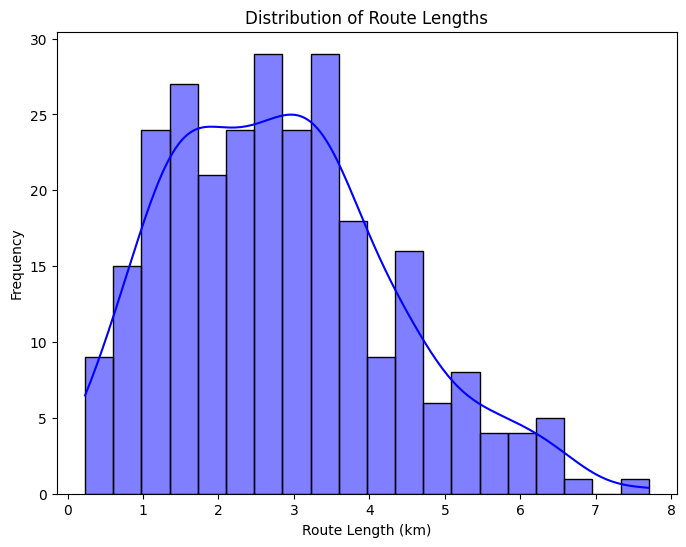

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Route Lengths
plt.figure(figsize=(8, 6))
sns.histplot(bicycle_routes_df["route_length"], bins=20, kde=True, color="blue")
plt.title("Distribution of Route Lengths")
plt.xlabel("Route Length (km)")
plt.ylabel("Frequency")
plt.show()

**What does the Plot say**

Here is a graph showing how often different route lengths occur, with a Kernel Density Estimate curve overlaid on the histogram. 

Most of the paths seem to range from 2 to 4 kilometers, in length with a few paths stretching beyond the 6 kilometer mark. 

The data also shows that there are routes, than are shorter ones, in the distribution. 

It implies that the city mainly features bike paths of medium-length. 

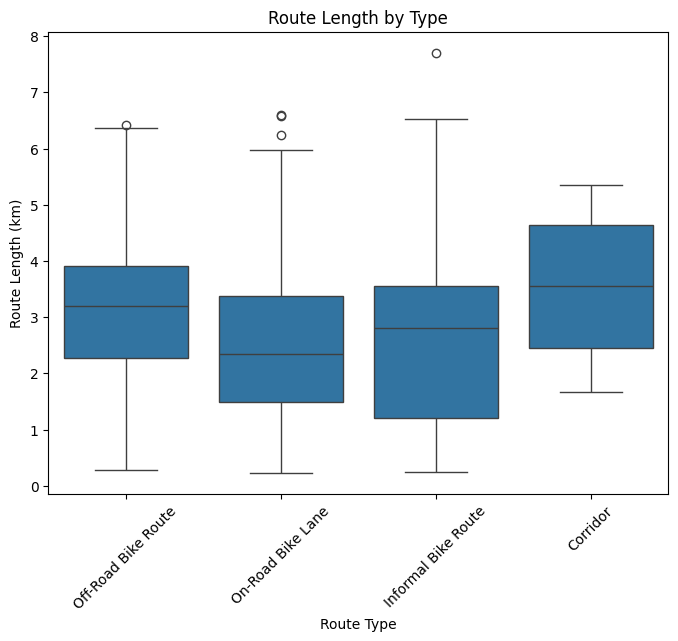

In [32]:
# Boxplot of Route Lengths by Route Type
plt.figure(figsize=(8, 6))
sns.boxplot(x="type", y="route_length", data=bicycle_routes_df)
plt.title("Route Length by Type")
plt.xlabel("Route Type")
plt.ylabel("Route Length (km)")
plt.xticks(rotation=45)
plt.show()

**What does the Plot Say**

Various types of routes (such, as Off Road Bike Routes and On Road Bike Lanes) generally exhibit lengths.however the variability, in length varies between them. 

Some types of routes may have outliers that're longer in length, this could be significant, for recognizing routes or designing infrastructure projects. 


In [33]:
# Ensure latitude and longitude in bike_counts_df are floats
bike_counts_df["latitude"] = bike_counts_df["latitude"].astype(float)
bike_counts_df["longitude"] = bike_counts_df["longitude"].astype(float)

bicycle_routes_df["geo_point_2d"] = bicycle_routes_df["geo_point_2d"].apply(
    lambda x: tuple(map(float, x.split(", "))) if isinstance(x, str) else None
)

# Function to find the nearest route for each bike count location
def find_nearest_route(row, routes_df):
    bike_location = (row["latitude"], row["longitude"])
    distances = routes_df["geo_point_2d"].apply(
        lambda x: geodesic(bike_location, x).kilometers if x else float("inf")
    )
    nearest_index = distances.idxmin()  
    return nearest_index

# Add the nearest route index to bike_counts_df
bike_counts_df["nearest_route_index"] = bike_counts_df.apply(
    find_nearest_route, axis=1, routes_df=bicycle_routes_df
)

merged_df = bike_counts_df.merge(
    bicycle_routes_df, left_on="nearest_route_index", right_index=True, how="inner"
)

In [34]:
print(merged_df.head())

  state electorate  site_id   latitude   longitude  legs  \
0   VIC  Melbourne     4406 -37.794117  144.927689     4   
1   VIC  Melbourne     4408 -37.795096  144.935852     4   
2   VIC  Melbourne     4409 -37.795421  144.938850     5   
3   VIC  Melbourne     4412 -37.799747  144.957474     4   
4   VIC  Melbourne     4413 -37.800289  144.943954     4   

                                         description  layout_1  \
0  McCracken St [N], Macaulay Rd [E], Kensington ...         0   
1  Upstream direction [N], Macaulay Rd [E], Moone...         7   
2  Boundary Rd [N], Canning St [E], Macaulay Rd [...         8   
3  Royal Pde [N], Grattan St [E], Royal Pde (city...         6   
4  Arden St towards Curzon St [E], Drvyburgh St [...        98   

   layout_1_enter  layout_2  ...  \
0             180        98  ...   
1             187        98  ...   
2             188        98  ...   
3             186        98  ...   
4             278       188  ...   

                         

In [35]:
# Correlation Analysis
correlation = merged_df[["route_length", "total"]].corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
              route_length     total
route_length      1.000000 -0.153758
total            -0.153758  1.000000


**Observations**

1. Coorelation of 1.000000 between route_length vs route_length indicates perfect self-coorelation.
2. Coorelation of 1.000000 between total vs total shows perfect self-coorelation
3. Corelation  between -0.153758 between route_length vs total shows a very weak negative linear relationship. It indicates that as route length increases, total bike counts may slightly decrease.

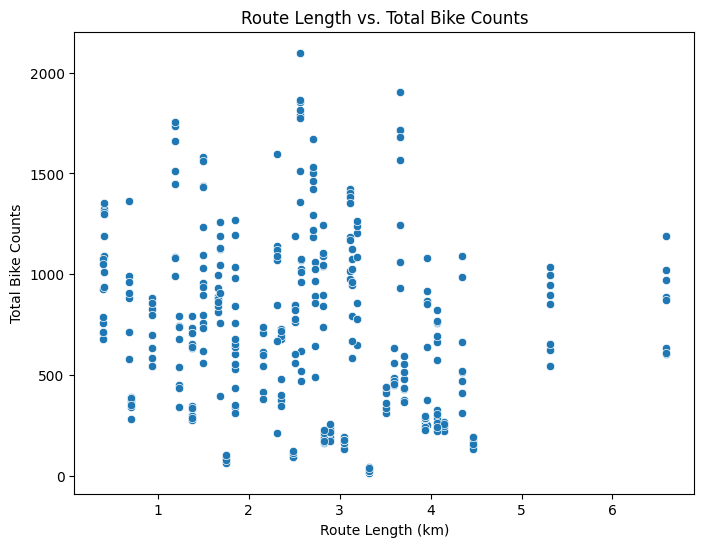

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="route_length", y="total", data=merged_df)
plt.title("Route Length vs. Total Bike Counts")
plt.xlabel("Route Length (km)")
plt.ylabel("Total Bike Counts")
plt.show()

**Scatter Plot: Route Length vs. Total Bike Counts**

**Observations:**

1. Bike counts are spread across all route lengths, but shorter routes (~1–3 km) tend to have a wider range of bike counts.

2. Longer routes (>4 km) are fewer and seem to have lower bike counts in general.



In [37]:
grouped = merged_df.groupby("type")[["route_length", "total"]].mean()
print(grouped)

                     route_length        total
type                                          
Informal Bike Route      0.535230  1060.933333
Off-Road Bike Route      3.203706   864.776471
On-Road Bike Lane        2.572555   648.714286


**Statement on Route Calculation:**

The lengths of the routes were calculated based on the coordinates found in the geo_point_2d column of the dataset that has latitude and longitude values included. To determine these distances we utilized the method from the geopy.distance library. This technique calculates the distance, between two points, on Earths surface by considering its curvature resulting in dependable calculations. 

The calculations, in question are based on a path between points in succession which works well for tasks like recognizing travel patterns and grouping similar routes together but might slightly underestimate the true distances of routes that have noticeable curves or deviations from the straight line path. Despite this limitation in accuracy due to curves or deviations in routes the calculated lengths of the routes should still be suitable for this projects needs. Offering a foundation, for deeper analysis and discoveries. 

**Grouped Summary: Bike Count and Route Length by Type**

**Observations:**

**Informal Bike Routes:**

Shortest average route length (0.535 km).

Highest average total bike counts (1060.93).

Suggests that these shorter informal routes might be more accessible or connect high-traffic areas.

**Off-Road Bike Routes:**

Longest average route length (3.20 km).

Moderate bike counts (864.77).

Indicates that longer off-road routes are used less but still see moderate traffic.

**On-Road Bike Lanes:**

Average length (2.57 km).

Lowest bike counts (648.71).

Indicates potential underutilization or poor infrastructure for on-road bike lanes.


**Implications:**

People often prefer using bike paths even though they are shorter, in distance, this could suggest a requirement, for improved infrastructure or formalization of these routes. 

We can consider focusing on improving infrastructure, for, off road biking routes to enhance their accessibility and promote usage. 

Bike lanes on the road appear to be not used to their potential and require a look, at where they are located and how safe and connected they are. 

**1.4 Feature Engineering and Exploratory Data Analysis**

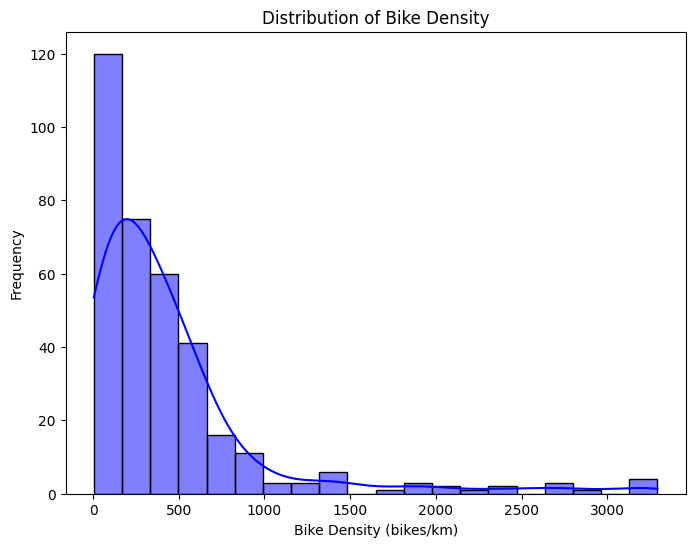

In [38]:
#1. Distribution of Bike Density
merged_df["bike_density"] = merged_df["total"] / merged_df["route_length"]

#Plot bike density distribution
plt.figure(figsize=(8, 6))
sns.histplot(merged_df["bike_density"], kde=True, bins=20, color="blue")
plt.title("Distribution of Bike Density")
plt.xlabel("Bike Density (bikes/km)")
plt.ylabel("Frequency")
plt.show()

**Observations:**

Most routes have lower bike densities, with a few outliers having very high densities.

High-density routes may correspond to shorter, more utilized routes.

Low-density routes might represent underutilized or longer routes.

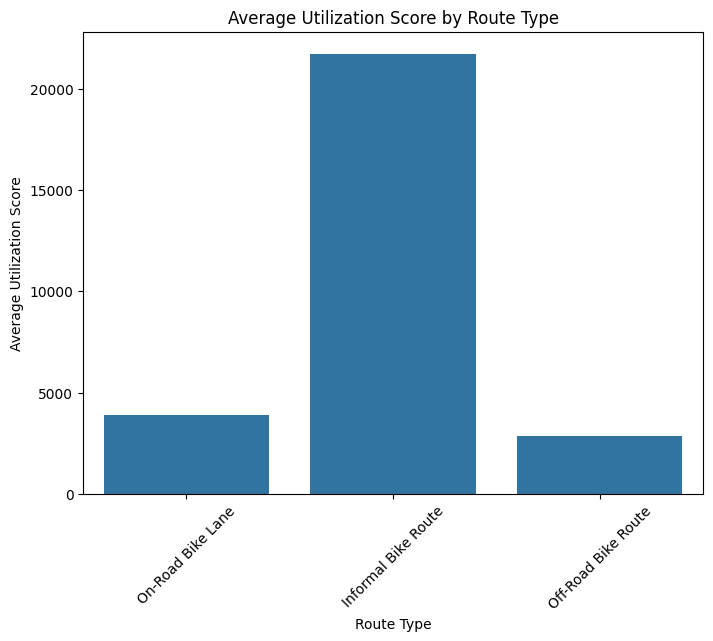

In [39]:
#2 Average Utilization Score by Route Type
merged_df["utilization_score"] = merged_df["bike_density"] * 10  # Adjust multiplier as needed

# Bar plot of average utilization score by route type
plt.figure(figsize=(8, 6))
sns.barplot(x="type", y="utilization_score", data=merged_df, estimator="mean", errorbar=None)
plt.title("Average Utilization Score by Route Type")
plt.xlabel("Route Type")
plt.ylabel("Average Utilization Score")
plt.xticks(rotation=45)
plt.show()

**Observations:**

Informal Bike Routes have significantly higher utilization scores compared to On-Road and Off-Road Bike Routes.

Casual pathways could be positioned strategically with improved connections that will result in increased usage. 

Improving infrastructure and connectivity, for both on road and, off road routes could boost their usage levels. 

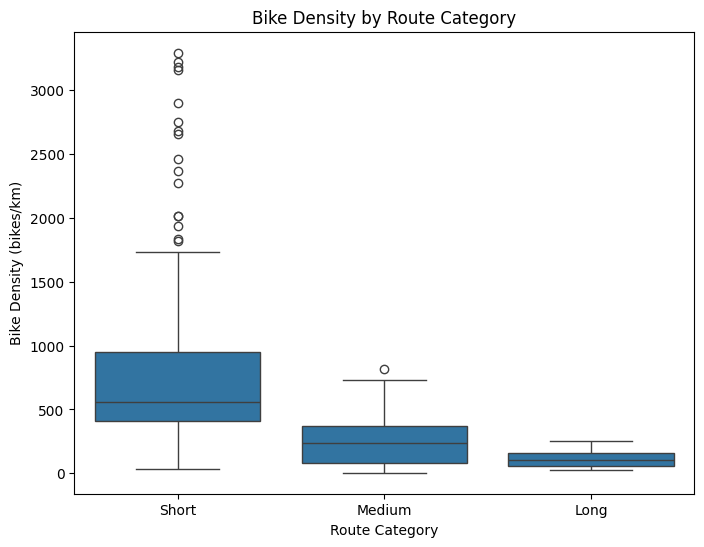

In [40]:
#3 Bike Density by Route category
# Define bins and labels for route categories
bins = [0, 2, 4, merged_df["route_length"].max()]
labels = ["Short", "Medium", "Long"]

# Create the 'route_category' column
merged_df["route_category"] = pd.cut(merged_df["route_length"], bins=bins, labels=labels)

plt.figure(figsize=(8, 6))
sns.boxplot(x="route_category", y="bike_density", data=merged_df)
plt.title("Bike Density by Route Category")
plt.xlabel("Route Category")
plt.ylabel("Bike Density (bikes/km)")
plt.show()

**Observations:**

Routes that are shorter tend to have a bike density and show more variability with some outliers.

Medium and extended routes exhibit levels of congestion and consistent traffic patterns. 

People tend to use short routes often, this could be because they connect important locations or are simpler to follow. 

To encourage people to use routes it may be beneficial to improve the facilities, in place or launch awareness campaigns. 

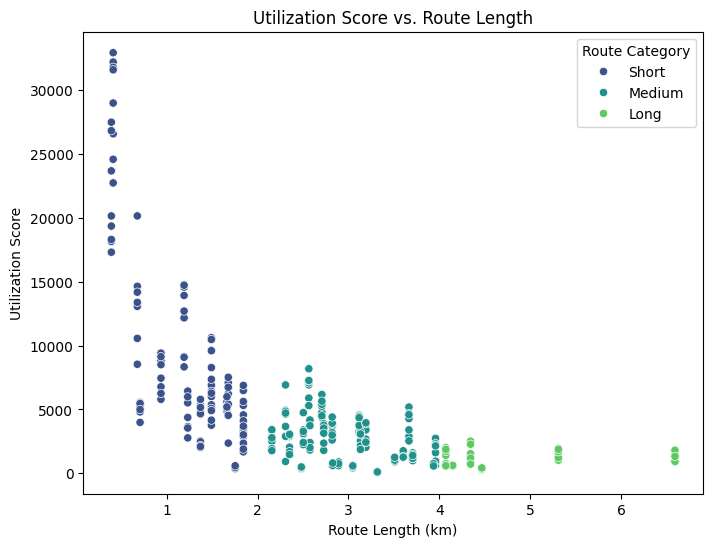

In [41]:
# Utilization Score vs. Route Length (Colored by Route Category)
merged_df["utilization_score"] = merged_df["bike_density"] * 10  # Example scaling factor

# Scatter plot for utilization score vs. route length
plt.figure(figsize=(8, 6))
sns.scatterplot(x="route_length", y="utilization_score", hue="route_category", data=merged_df, palette="viridis")
plt.title("Utilization Score vs. Route Length")
plt.xlabel("Route Length (km)")
plt.ylabel("Utilization Score")
plt.legend(title="Route Category")
plt.show()

**Observations:**

scatter plot illustrates the relationship, between utilization score and route length based on medium and long distance routes."

Scores of usage decrease, as the length of the route increases so on long routes. 

Shorter routes often receive utilization scores because they are more practical and frequently used by people. 

Longer routes may require enhancements to the infrastructure in order to improve access and traffic flow. 

In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
merged_df["type_encoded"] = label_encoder.fit_transform(merged_df["type"])

 **1.5 Data Cleaning and Preprocessing**

In [49]:
#removing outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ["route_length", "bike_density", "total"]:
    merged_df = remove_outliers(merged_df, col)

In [50]:
#Standardize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = ["route_length", "bike_density", "utilization_score"]
merged_df[scaled_features] = scaler.fit_transform(merged_df[scaled_features])

For data cleaning, we handled outliers in key numerical columns (route_length, bike_density, total) using the IQR method to ensure data consistency. Duplicate rows were checked and confirmed to be absent, and all numerical features were standardized using StandardScaler to maintain uniformity across scales. This prepared the dataset for reliable analysis and modeling.

**1.6 Predictive Modelling**

**Aim of Predictive Modeling:**

1. Predict total bike counts on routes based on features like route length, bike density, and route type.

2. Identify key factors influencing bike usage using feature importance.

3. Optimize infrastructure planning by forecasting traffic on underutilized or high-demand routes.

4. Evaluate and compare model performance to choose the best predictive approach.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
features = ["route_length", "bike_density", "type_encoded", "utilization_score"]
X = merged_df[features]
y = merged_df["total"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

In [55]:
#Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [56]:
#Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [57]:
#Model 3: Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)

In [58]:
# Model 4: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [59]:
# Model 5: Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

In [60]:
# Model 6: Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)

In [61]:
#Evaluate the models
def evaluate_model(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")
    return mse, rmse, r2

In [63]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

ridge_preds = ridge_model.predict(X_test)

results = {}
results['Linear Regression'] = evaluate_model("Linear Regression", y_test, lr_preds)
results['Ridge Regression'] = evaluate_model("Ridge Regression", y_test, ridge_preds)
results['Lasso Regression'] = evaluate_model("Lasso Regression", y_test, lasso_preds)
results['Random Forest'] = evaluate_model("Random Forest", y_test, rf_preds)
results['Gradient Boosting'] = evaluate_model("Gradient Boosting", y_test, gb_preds)
results['Support Vector Regressor'] = evaluate_model("SVR", y_test, svr_preds)

Linear Regression - MSE: 49032.70, RMSE: 221.43, R²: 0.79
Ridge Regression - MSE: 49278.08, RMSE: 221.99, R²: 0.79
Lasso Regression - MSE: 49361.70, RMSE: 222.17, R²: 0.79
Random Forest - MSE: 4040.00, RMSE: 63.56, R²: 0.98
Gradient Boosting - MSE: 3103.56, RMSE: 55.71, R²: 0.99
SVR - MSE: 210235.15, RMSE: 458.51, R²: 0.10


In [ ]:
model_names = list(results.keys())
rmse_values = [result[1] for result in results.values()]

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=rmse_values, palette='Blues_d')
plt.title('Comparison of Model RMSE')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
importances = rf_model.feature_importances_
feature_names = X.columns
sns.barplot(x=feature_names, y=importances, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()